In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import matplotlib.pyplot as plt
from utils import create_directory, plot_simulations, plot_training_log, window_average
import json
import numpy as np
from model import test

In [2]:
data_dir = create_directory(directory_name='try1')

model_num = 6
model_name = "model{:02d}".format(model_num)
phase: int = 3
ff_coefficient = float(str(0))

weight_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_weights")
log_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_log.json")
cfg_file = os.path.join(data_dir, f"{model_name}_phase={phase}_FFCoef={ff_coefficient}_cfg.json")

Directory '/Users/mahdiyarshahbazi/Documents/Data/try1' already exists.


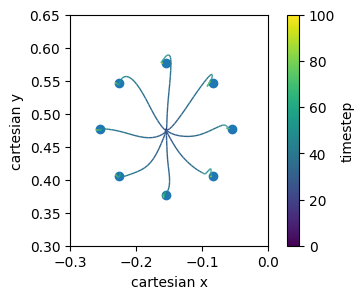

In [3]:
xy, tg = test(cfg_file,weight_file)
plot_simulations(xy=xy, target_xy=tg)

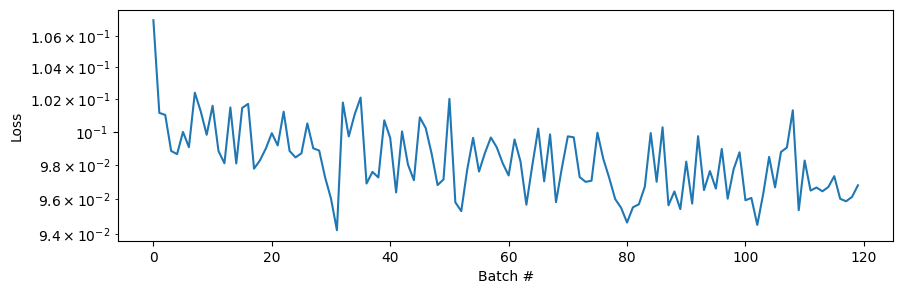

In [5]:
# retrieve and plot training history
with open(log_file,'r') as file:
    loaded_training_log = json.load(file)

fig = plt.figure(figsize=(10,3))
loaded_training_log = window_average(np.array(loaded_training_log),w=50)
ax = plot_training_log(log=loaded_training_log)